In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bank_df = pd.read_csv(f"bank.csv",sep=';')
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [2]:
num_cols = bank_df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [22]:
# Get age column data
print("================loc=================")
age_df = bank_df.loc[:,'age']
print(age_df)
# print("===============take==================")
# age_df = bank_df.take([0],axis=1)
# print(age_df)
# print("===============iloc==================")
# age_df = bank_df.iloc[:,0]
# print(age_df)
print("===============Min age==================")
print(min(bank_df['age']))
print("===============Max age==================")
print(max(bank_df['age']))

================loc=================
0       30
1       33
2       35
3       30
4       59
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64
===============Min age==================
19
===============Max age==================
87


In [20]:
# bank_df.loc[1] #or #bank_df.loc[1][:]
# bank_df.loc[1]['job']
# bank_df.loc[:]['job'] # or # bank_df.loc[:,'job']

In [23]:
# Get mean of the ages
mean = sum(bank_df['age'])/len(bank_df['age'])
mean

41.17009511170095

In [24]:
np.mean(bank_df['age'])

41.17009511170095

In [25]:
# Get median of the ages
np.median(bank_df['age'])

39.0

In [26]:
# Get std of the ages
np.std(bank_df['age'])

10.575041217961282

In [27]:
# Get count, mean, median and standard deviation of balance
count_bal = bank_df['balance'].nunique()
mean_bal = round(np.mean(bank_df['balance']),2)
median_bal = round(np.median(bank_df['balance']),2)
std_bal = round(bank_df['balance'].std(),2)

print(f"Number of balances: {count_bal}")
print(f"The average balance is: {mean_bal}")
print(f"The median balance is: {median_bal}")
print(f"Standard deviation of balance = {std_bal}")
print(round(np.std(bank_df['balance']),2))

Number of balances: 2353
The average balance is: 1422.66
The median balance is: 444.0
Standard deviation of balance = 3009.64
3009.31


In [3]:
# Create DataFrame with Count, min, max, mean, medain, std for balance
count_bal = len(bank_df['balance'])
min_bal = min(bank_df['balance'])
max_bal = max(bank_df['balance'])
mean_bal = np.mean(bank_df['balance'])
median_bal = np.median(bank_df['balance'])
std_bal = np.std(bank_df['balance'])
balance_list = [count_bal,min_bal,max_bal,mean_bal,median_bal,std_bal]
indices = ['Count','Min','Max','Mean','Median','Std']
bal_df = pd.DataFrame(balance_list,columns=['Balance'],index=indices)
bal_df

,Balance
Count,4521.000000
Min,-3313.000000
Max,71188.000000
Mean,1422.657819
Median,444.000000
Std,3009.305273


In [33]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [34]:
np.percentile(bank_df['balance'],25)

69.0

In [35]:
np.percentile(bank_df['balance'],50)

444.0

In [37]:
np.percentile(bank_df['balance'],[40,80])

array([ 263., 1957.])

In [38]:
np.quantile(bank_df['balance'],0.25)

69.0

In [39]:
np.quantile(bank_df['balance'],[0.4,.8])

array([ 263., 1957.])

In [4]:
# Create DataFrames for all numerical columns with Count,min,max, mean,median,std, 25p,50p,75percentiles

num_cols = bank_df.select_dtypes(exclude='object').columns
indices = ['Count','Min','Max','Mean','Median','Std','25P','50P','75P']
df = pd.DataFrame()
for i in num_cols:
    counts = len(bank_df[i])
    min_value = min(bank_df[i])
    max_value = max(bank_df[i])
    mean_value = round(np.mean(bank_df[i]),2)
    median_value = round(np.median(bank_df[i]),2)
    std_value = round(np.std(bank_df[i]),2)
    p_25 = round(np.percentile(bank_df[i],25),2)
    p_50 = round(np.percentile(bank_df[i],50),2)
    p_75 = round(np.percentile(bank_df[i],75),2)
    values_list = [counts,min_value,max_value,mean_value,median_value,std_value,p_25,p_50,p_75]
    temp_df = pd.DataFrame(data=values_list,index=indices,columns=[i])
    df = pd.concat([df,temp_df],axis=1)
df

,age,balance,day,duration,campaign,pdays,previous
Count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
Min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
Max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00
Mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
Median,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
Std,10.58,3009.31,8.25,259.83,3.11,100.11,1.69
25P,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50P,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75P,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00


In [5]:
# Get the data who have balance less than 25percentile
bal_data = bank_df['balance']
bal_25p = np.percentile(bal_data,25)
cond = bal_data<=bal_25p
print(f"Customers having balance less than 25 percentile '{bal_25p}' : {len(bank_df[cond])}")
bank_df[cond]

Customers having balance less than 25 percentile '69.0' : 1133


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
20,38,management,divorced,unknown,no,0,yes,no,cellular,18,nov,96,2,-1,0,unknown,no
21,42,management,divorced,tertiary,no,16,no,no,cellular,19,nov,140,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,31,entrepreneur,single,tertiary,no,38,no,no,cellular,20,nov,185,2,-1,0,unknown,no
4502,42,services,married,secondary,no,-91,yes,yes,cellular,5,feb,43,1,-1,0,unknown,no
4506,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,29,aug,85,4,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no


In [8]:
# Get the 1 standard deviation of balance
lb = mean_bal - (1*std_bal)
ub = mean_bal + (1*std_bal) 
cond1 = bank_df['balance']>lb
cond2 = bank_df['balance']<ub
cond3 = cond1&cond2
print(f"1 standard deviation of balance: {len(bank_df[cond3])}")
bank_df[cond3]

1 standard deviation of balance: 4143


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [27]:
# Get the 1 standard deviation of balance using empirical rule
len(bank_df['balance'])*68/100

3074.28

#### Histogram


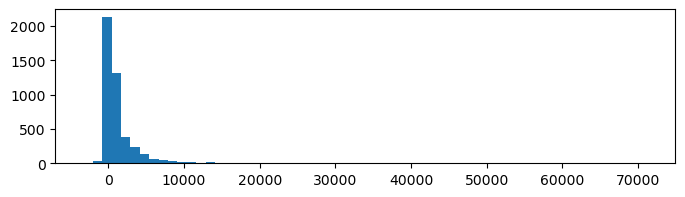

In [18]:
bal_df = bank_df['balance']
plt.figure(figsize=(8,2))
plt.hist(bal_df,bins=60)
plt.show()

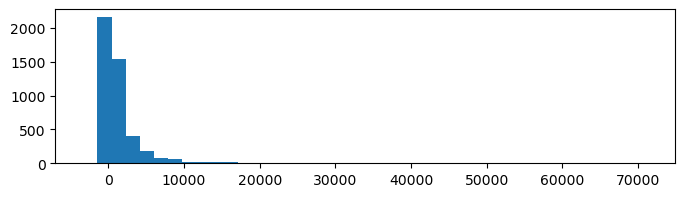

In [33]:
bal_df = bank_df['balance']
plt.figure(figsize=(8,2))
count,bins,x = plt.hist(bal_df,bins=40)
plt.show()

In [26]:
count

array([4.000e+00, 2.168e+03, 1.540e+03, 3.990e+02, 1.760e+02, 8.300e+01,
       5.600e+01, 2.500e+01, 1.600e+01, 1.600e+01, 1.200e+01, 3.000e+00,
       4.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

In [27]:
bins

array([-3313.   , -1450.475,   412.05 ,  2274.575,  4137.1  ,  5999.625,
        7862.15 ,  9724.675, 11587.2  , 13449.725, 15312.25 , 17174.775,
       19037.3  , 20899.825, 22762.35 , 24624.875, 26487.4  , 28349.925,
       30212.45 , 32074.975, 33937.5  , 35800.025, 37662.55 , 39525.075,
       41387.6  , 43250.125, 45112.65 , 46975.175, 48837.7  , 50700.225,
       52562.75 , 54425.275, 56287.8  , 58150.325, 60012.85 , 61875.375,
       63737.9  , 65600.425, 67462.95 , 69325.475, 71188.   ])

In [34]:
lb = -33130
ub = -1450.475

cond1 = bank_df['balance']>=lb
cond2 = bank_df['balance']<=ub
cond3 = cond1&cond2
print(len(bank_df[cond3]))

4


In [35]:
count[0]

4.0

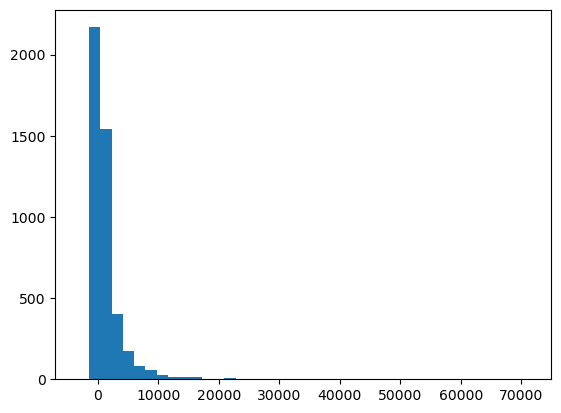

In [35]:
bal_df = bank_df['balance']
count,bins,x = plt.hist(bal_df,bins=40)
cols = ['lb','ub','Count']
bins_data = []
for i in range(len(count)):
    lb = bins[i]
    ub = bins[i+1]
    bins_data.append([lb,ub,count[i]])
df = pd.DataFrame(bins_data,columns=cols)
# print(df)
plt.savefig("BalanceHistogram.png")

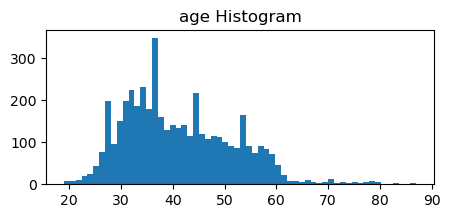

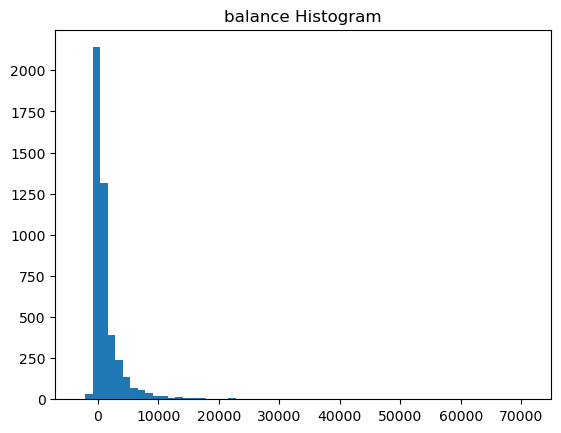

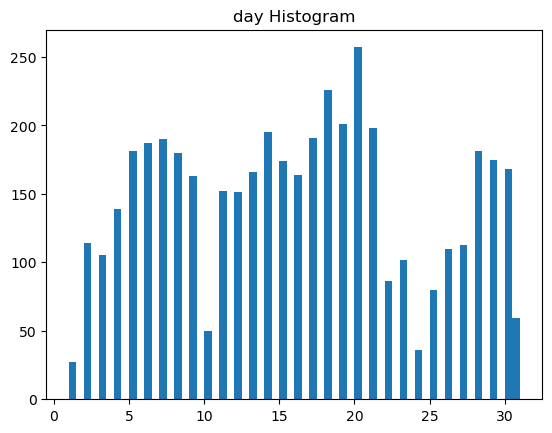

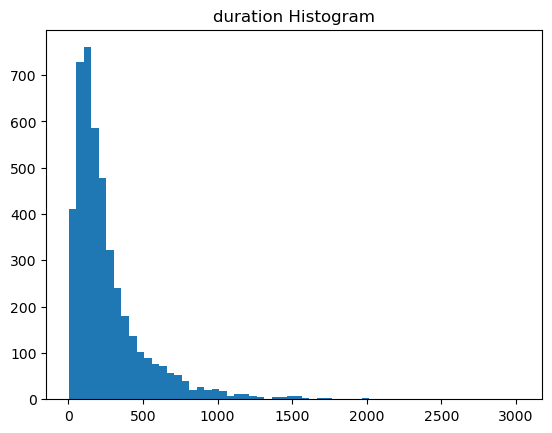

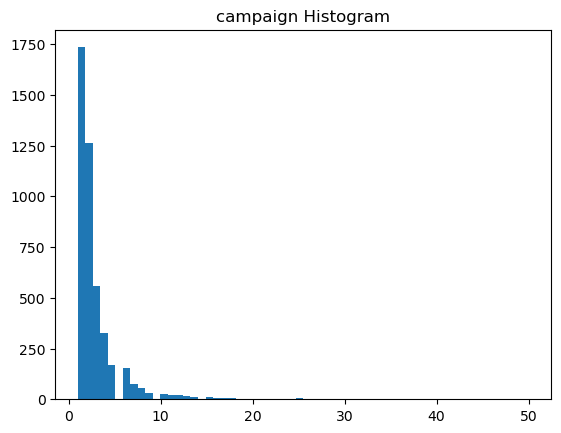

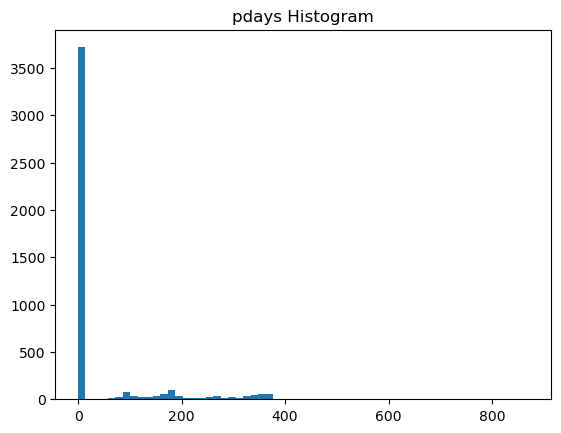

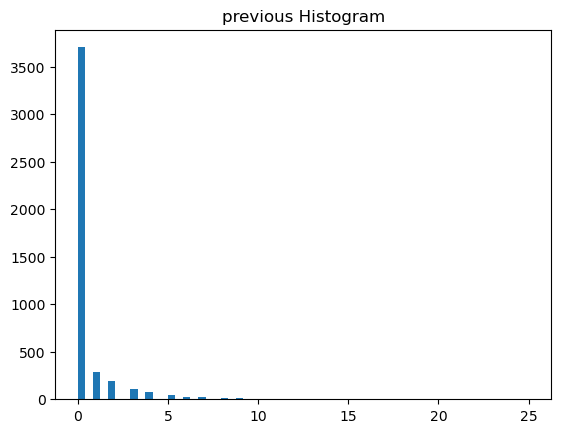

In [30]:
# Draw and save histogram for all Numerical columns
num_cols = bank_df.select_dtypes(exclude='object').columns
plt.figure(figsize=(5,2))
for i in num_cols:
    column_df = bank_df[i]
    plt.hist(column_df,bins=60)
    plt.title(f"{i} Histogram")
    plt.savefig(f"{i}_Hist.png")
    plt.show()

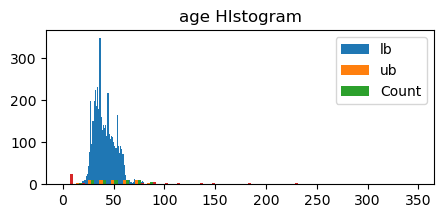

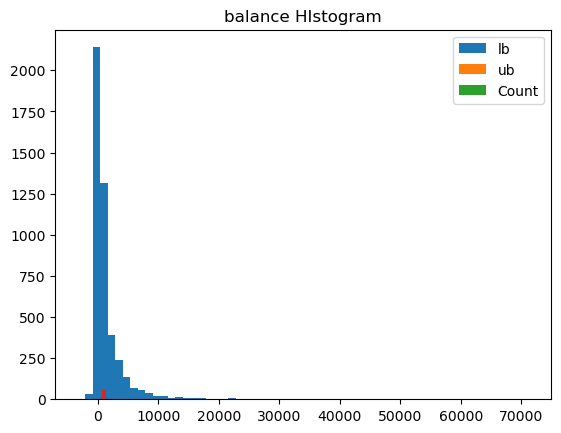

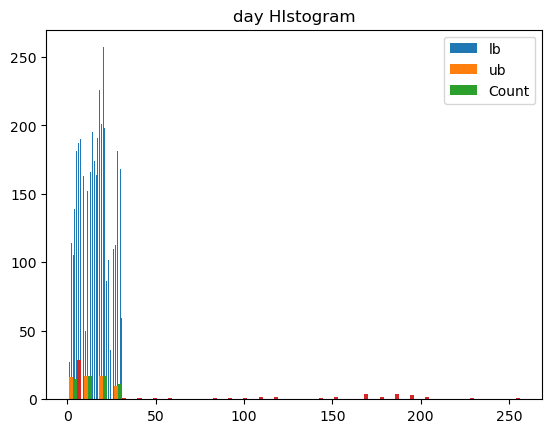

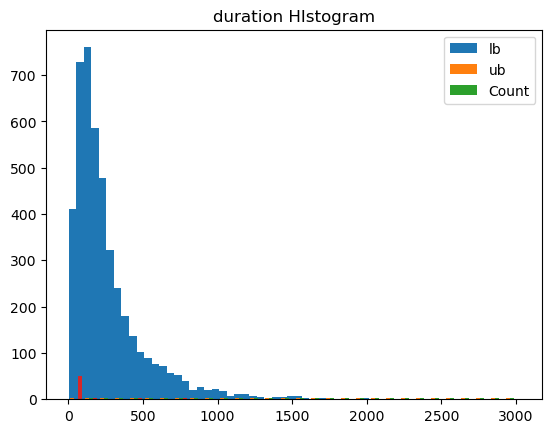

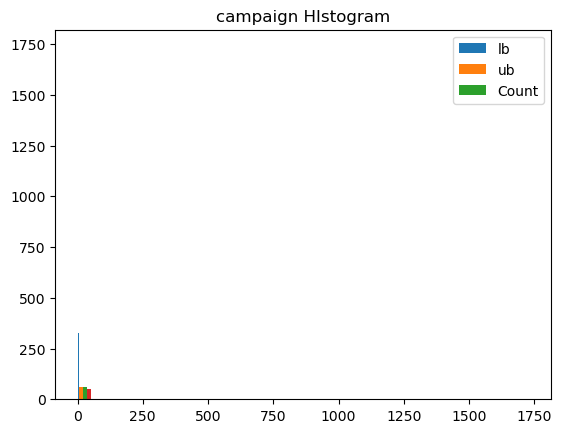

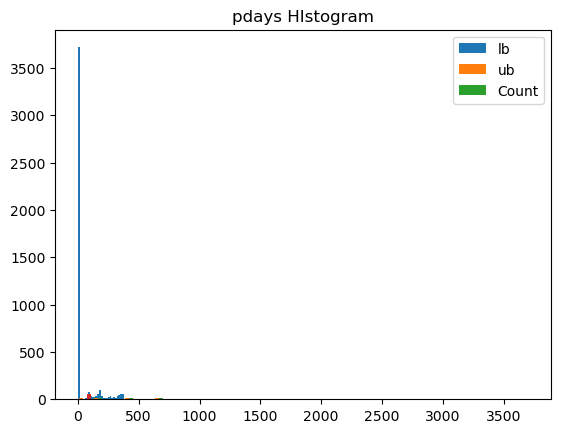

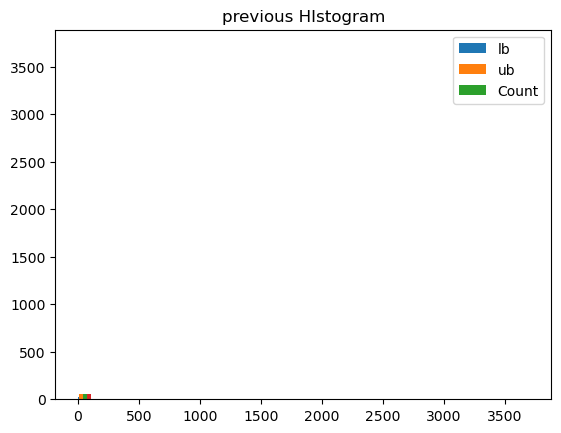

In [45]:
# Draw histograms for all Numerical columns with lb,ub,count
num_cols = bank_df.select_dtypes(exclude='object').columns
cols = ['lb','ub','Count']
plt.figure(figsize=(5,2))
for c in num_cols:
    bins_data = []
    column_df = bank_df[c]
    cnt,bins,x = plt.hist(column_df,bins=60)
    for i in range(len(cnt)):
        lb = bins[i]   
        ub = bins[i+1]
        count = cnt[i]
        bins_data.append([lb,ub,count])
    df = pd.DataFrame(bins_data,columns=cols)
    # print(df)
    plt.hist(df,bins=30)
    plt.legend(cols)
    plt.title(f"{c} HIstogram")
    plt.show()

#### Draw the Boxplot using matplotlib

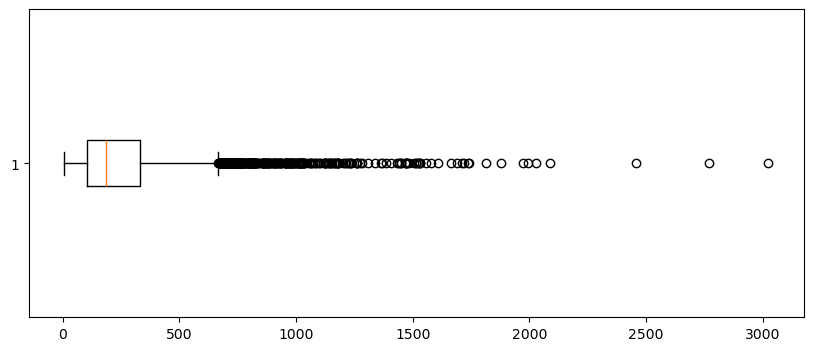

In [60]:
plt.figure(figsize=(10,4))
plt.boxplot(bank_df['duration'],vert=False)
plt.show()

#### Draw the Boxplot using Seaborn

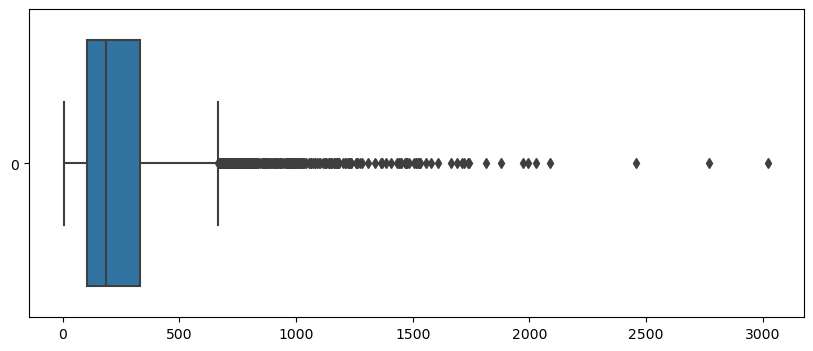

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bank_df = pd.read_csv(f"bank.csv",sep=';')
num_cols = bank_df.select_dtypes(exclude='object').columns
plt.figure(figsize=(10,4))
sns.boxplot(data=bank_df['duration'],orient='h')
plt.show()

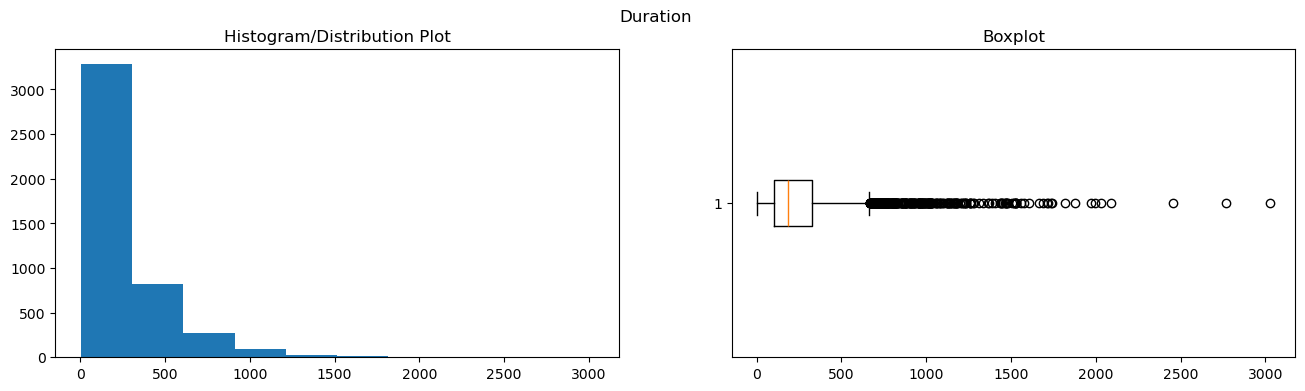

In [74]:
# Plot the distribution plot (Histogram) and Boxplot side by side
plt.figure(figsize=(16,4))
duration_df = bank_df['duration']
plt.suptitle("Duration")
plt.subplot(1,2,1)
plt.hist(duration_df)
plt.title("Histogram/Distribution Plot")
plt.subplot(1,2,2)
plt.boxplot(duration_df,vert=False)
plt.title("Boxplot")
plt.show()

Outliers = -233.5 and 666.5
==============================================Duration with Outliers data===============================================
30       897
33       958
38       765
50      1018
51      1740
        ... 
4498     676
4503     816
4504     951
4505    1234
4511    1263
Name: duration, Length: 330, dtype: int64
=========================================Bank data with Duration Outliers data==========================================
      age            job   marital  education default  balance housing loan  \
30     68        retired  divorced  secondary      no     4189      no   no   
33     32     management    single   tertiary      no     2536     yes   no   
38     33     management   married  secondary      no     3935     yes   no   
50     45    blue-collar  divorced    primary      no      844      no   no   
51     37     technician    single  secondary      no      228     yes   no   
...   ...            ...       ...        ...     ...      ...     ... 

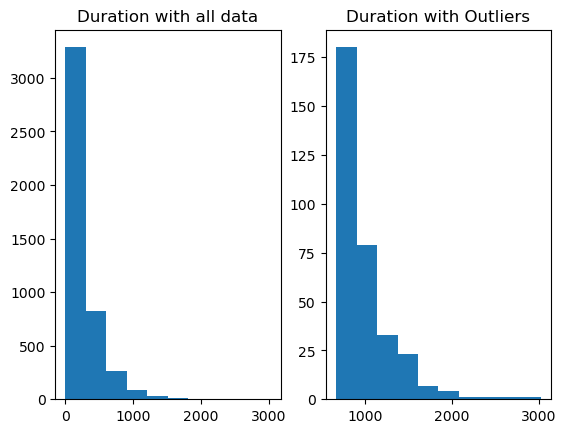

In [88]:
# Find the outliers in duration data
duration_df = bank_df['duration']
q1 = np.percentile(duration_df,25)
q3 = np.percentile(duration_df,75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
print(f"Outliers = {lb} and {ub}")
cond1 = duration_df<lb
cond2 = duration_df>ub
cond3 = cond1|cond2
duration_outliers = duration_df[cond3]
print(f"Duration with Outliers data".center(120,'='))
print(duration_outliers)
print(f"Bank data with Duration Outliers data".center(120,'='))
print(bank_df[cond3])

plt.subplot(1,2,1).hist(duration_df)
plt.title("Duration with all data")
plt.subplot(1,2,2).hist(duration_outliers)
plt.title("Duration with Outliers")
plt.show()

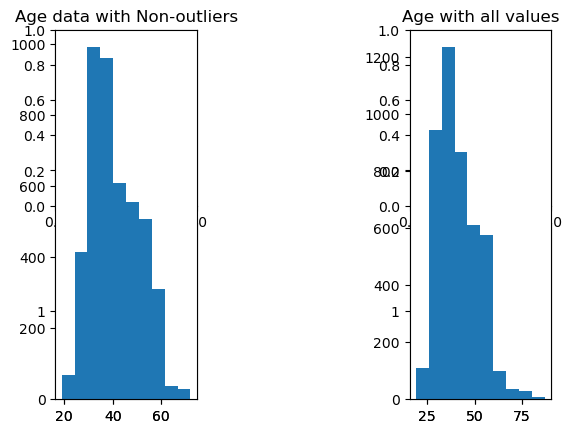

In [161]:
# Get the non-outliers DataFrame from age column. And draw the boxplot
age_df = bank_df['age']
q1 = np.percentile(age_df,25)
q3 = np.percentile(age_df,75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
cond1 = age_df>lb
cond2 = age_df<ub
cond3 = cond1&cond2
# print(f"age column with Non-outliers data".center(120,'='))
# print(age_df[cond3])
# print(f"bank data with Non-outliers data of age".center(120,'='))
# print(bank_df[cond3])
plt.figure(figsize=(15,4))
plt.subplot(1,2,1).hist(age_df[cond3])
plt.title(f"Age data with Non-outliers")
plt.subplot(1,2,2).hist(bank_df['age'])
plt.title(f"Age with all values")
plt.subplots_adjust(hspace=0.1,wspace=1.5)

plt.subplot(2,2,3).boxplot(age_df[cond3],vert=False)
plt.subplot(2,2,4).boxplot(bank_df['age'],vert=False)

plt.show()